In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from statsmodels.stats.anova import AnovaRM
import pylab

In [2]:
# weights_data = pd.read_excel('../Data/LECO/Input/NxIrr_LECO_Weights_withCN_3_25.xlsx', sheet_name='LECO_NxIrr', engine='openpyxl')
# weights_data = weights_data[['Set ID','Description', 'Mass', 'Comments','Replicate ID']]
# weights_data = weights_data.groupby(['Set ID','Description','Comments','Replicate ID']).mean().reset_index()
# print(weights_data.shape)
# weights_data.head()

In [3]:
# weights_data.dtypes

In [4]:
# cn_data = pd.read_csv('../Data/LECO/Output/leco-carbon-nitrogen_thru_1235_3_25.csv')
# cn_data = cn_data[['Set ID','Carbon','Nitrogen']]
# cn_data = cn_data.replace({'%':''}, regex = True)
# cn_data['Carbon'] = cn_data['Carbon'].astype('float')
# cn_data['Nitrogen'] = cn_data['Nitrogen'].astype('float')
# cn_data = cn_data.groupby('Set ID').mean().reset_index()
# print(cn_data.shape)
# cn_data.head()

In [5]:
# final_df = pd.merge(weights_data, cn_data, right_on=['Set ID'], left_on=['Set ID'])
# final_df['Comments'] = final_df['Comments'].astype('str')
# final_df['Replicate ID'] = final_df['Replicate ID'].astype('str')
# final_df = final_df[~final_df['Replicate ID'].isna()]
# final_df = final_df[final_df['Replicate ID'] != 'Standard']
# final_df = final_df[final_df['Comments'] != 'ARDEC']
# final_df['N_trt'] = [x[-1] for x in final_df['Comments']]
# final_df['W_trt'] = [x[1] for x in final_df['Comments']]
# final_df['Date'] = [x.split('-')[1] + '-' + x.split('-')[2][:2] for x in final_df['Replicate ID']]
# final_df = final_df[final_df['Carbon'] < 60]
# final_df = final_df[final_df['Carbon'] > 5]
# print(final_df.shape)
# final_df.head()

In [6]:
data = pd.read_excel('../Data/LECO/LECO Sample Weights and CN Akron NxIrr 2021.xlsx', engine='openpyxl')
data = data[data['Block'] > 0]
data['Replicate ID'] = data['Replicate ID'].astype('str')
data['Date'] = [x.split('-')[1] + '-' + x.split('-')[2][:2] for x in data['Replicate ID']]
data = data[data['Date'] != '07-21']
data = data[data['C'] < 0.7]
data['Carbon'] = data['C']
# data['Block'] = [str(int(x)) for x in data['Block']]
# data['IrrTrt'] = [str(int(x)) for x in data['IrrTrt']]
# data['NTrt'] = [str(int(x)) for x in data['NTrt']]
# data['Block'] = data['Block'].astype(str)
# data['IrrTrt'] = data['IrrTrt'].astype(str)
# data['NTrt'] = data['NTrt'].astype(str)
data['Description'] = data['Description'].replace({'Stalks':'Shoots'})
data_leaves = data[data['Description'] == 'Leaves']
# data_stalks = data[data['Description'] == 'Stalks']
data_shoots = data[data['Description'] == 'Shoots']
print(set(data_shoots['Date']))
print(set(data['Description']))
data.head()

{'06-30', '09-23', '08-04', '06-09'}
{'Shoots', 'Leaves', 'Cobs', 'Grain'}


,Set ID,Sample Type,Name,Method Name,Description,Replicate ID,Mass,Comments,Operator,Tray ID,C,N,Block,IrrTrt,NTrt,IrrxN,Date,Carbon
0,1,Sample,1,CORN LEAF,Shoots,2021-06-09 00:00:00,0.1245,216,NaN,NaN,0.447,0.0344,2.0,1.0,6.0,16,06-09,0.447
1,1,Sample,1,CORN LEAF,Shoots,2021-06-09 00:00:00,0.1246,216,NaN,NaN,0.446,0.0336,2.0,1.0,6.0,16,06-09,0.446
2,2,Sample,2,CORN LEAF,Shoots,2021-06-09 00:00:00,0.1212,323,NaN,NaN,0.449,0.0318,3.0,2.0,3.0,23,06-09,0.449
3,2,Sample,2,CORN LEAF,Shoots,2021-06-09 00:00:00,0.1279,323,NaN,NaN,0.446,0.0313,3.0,2.0,3.0,23,06-09,0.446
4,3,Sample,3,CORN LEAF,Shoots,2021-06-09 00:00:00,0.1022,311,NaN,NaN,0.414,0.0338,3.0,1.0,1.0,11,06-09,0.414


<AxesSubplot:xlabel='Date', ylabel='N'>

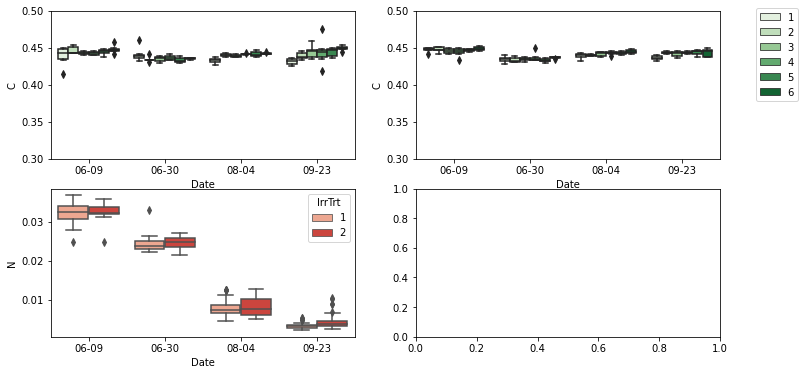

In [7]:
fig, axes = plt.subplots(2, 2, figsize=(12,6), sharey=False)
sns.boxplot(y = 'C', x = 'Date', hue = 'NTrt', palette = 'Greens', order = ['06-09','06-30','08-04','09-23'],
            data = data_shoots[data_shoots['IrrTrt'] == 1], hue_order = [1,2,3,4,5,6], ax = axes[0,0])
axes[0,0].get_legend().remove()
axes[0,0].set_ylim([0.3,0.5])
sns.boxplot(y = 'C', x = 'Date', hue = 'NTrt', palette = 'Greens', order = ['06-09','06-30','08-04','09-23'],
            data = data_shoots[data_shoots['IrrTrt'] == 2], hue_order = [1,2,3,4,5,6], ax = axes[0,1])
axes[0,1].legend(bbox_to_anchor=(1.1, 1.05))
axes[0,1].set_ylim([0.3,0.5])
sns.boxplot(y = 'N', x = 'Date', hue = 'IrrTrt', palette = 'Reds', order = ['06-09','06-30','08-04','09-23'],
            data = data_shoots, hue_order = [1,2], ax = axes[1,0])

In [8]:
# normality test
# Plot residuals
data_leaves['Clog'] = np.log(data_leaves['C'])
stat, p = shapiro(data_leaves['Clog'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.921, p=0.000
Sample does not look Gaussian (reject H0)


/home/bostevens/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


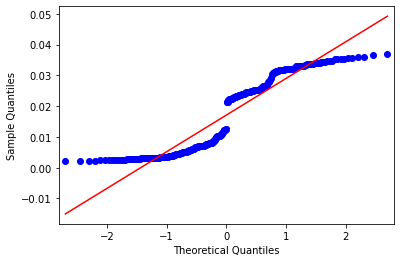

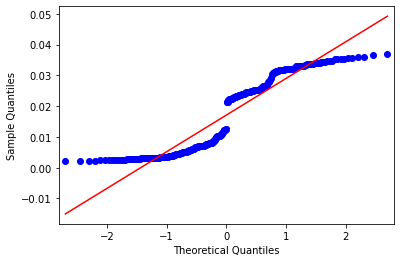

In [13]:
# QQ plot
sm.qqplot(data_shoots['N'], line = 's')

In [10]:
data_shoots.groupby(['Date']).count()

,Set ID,Sample Type,Name,Method Name,Description,Replicate ID,Mass,Comments,Operator,Tray ID,C,N,Block,IrrTrt,NTrt,IrrxN,Carbon
Date,,,,,,,,,,,,,,,,,
06-09,71,71,71,71,71,71,71,71,2,53,71,71,71,71,71,71,71
06-30,72,72,72,72,72,72,72,72,0,72,72,72,72,72,72,72,72
08-04,72,72,72,72,72,72,72,72,0,72,72,72,72,72,72,72,72
09-23,72,72,72,72,72,72,72,72,0,72,72,72,72,72,72,72,72


In [11]:
data_shoots[['C','N']].describe()

,C,N
count,287.000000,287.000000
mean,0.440774,0.017101
std,0.006662,0.011917
min,0.414000,0.002170
25%,0.436000,0.005235
50%,0.441000,0.012600
75%,0.445000,0.026850
max,0.475000,0.036800


<AxesSubplot:xlabel='C', ylabel='Count'>

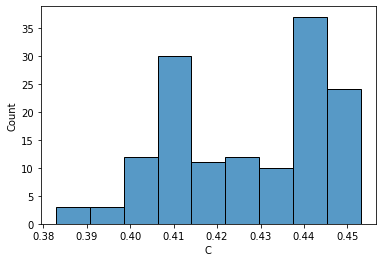

In [9]:
sns.histplot(data_leaves, x = 'C')

/home/bostevens/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='N', ylabel='Count'>

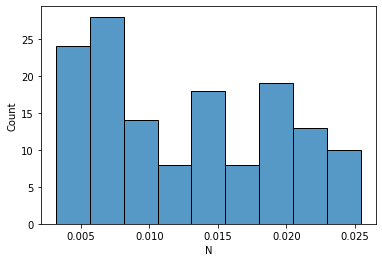

In [8]:
data_leaves['Nlog'] = np.log(data_leaves['N'])
sns.histplot(data_leaves, x = 'N')

In [153]:
model = AnovaRM(data_leaves, 'Carbon', 'Date', within = ['NTrt','IrrTrt'], aggregate_func='mean')
results = model.fit()
print(results)

                 Anova
            F Value Num DF Den DF Pr > F
----------------------------------------
NTrt        12.7159 5.0000 5.0000 0.0072
IrrTrt       2.3807 1.0000 1.0000 0.3661
NTrt:IrrTrt  4.2239 5.0000 5.0000 0.0699



In [155]:
model = AnovaRM(data_leaves, 'N', 'Date', within = ['NTrt','IrrTrt'], aggregate_func='mean')
results = model.fit()
print(results)

                 Anova
            F Value Num DF Den DF Pr > F
----------------------------------------
NTrt         7.1216 5.0000 5.0000 0.0252
IrrTrt      15.5676 1.0000 1.0000 0.1580
NTrt:IrrTrt  1.6782 5.0000 5.0000 0.2919

